# Chapter 11: Training Deep NN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
def logit(z):
    return 1/(1+np.exp(-z))

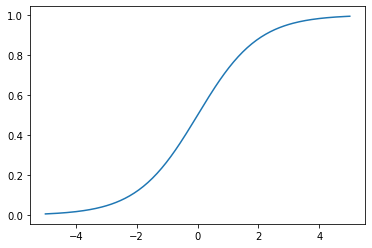

In [3]:
x = np.linspace(-5, 5, 200)
plt.plot(x, logit(x))

# Example of transfer learning in Keras

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full/255.0
X_test = X_test/255.0

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
def split_dataset(X, y):
    y_5_or_6 = (y==5) | (y==6)
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2
    y_B = (y[y_5_or_6] == 6).astype(np.float32)
    return((X[~y_5_or_6], y_A), (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)

X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [16]:
X_train_A.shape

(43986, 28, 28)

In [17]:
X_train_B.shape

(200, 28, 28)

In [18]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [14]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [19]:
tf.random.set_seed(42)
np.random.seed(42)

In [20]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation='selu'))
model_A.add(keras.layers.Dense(8, activation='softmax'))    

In [21]:
model_A.compile(loss='sparse_categorical_crossentropy', 
               optimizer=keras.optimizers.SGD(lr=1e-3), 
               metrics=['accuracy'])

In [22]:
history = model_A.fit(X_train_A, y_train_A, epochs=10, validation_data=(X_valid_A, y_valid_A))

Epoch 1/10
1375/1375 [==============================] - 6s 4ms/step - loss: 0.5926 - accuracy: 0.8103 - val_loss: 0.3893 - val_accuracy: 0.8670
Epoch 2/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3523 - accuracy: 0.8787 - val_loss: 0.3287 - val_accuracy: 0.8822
Epoch 3/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3170 - accuracy: 0.8896 - val_loss: 0.3011 - val_accuracy: 0.8986
Epoch 4/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2973 - accuracy: 0.8976 - val_loss: 0.2892 - val_accuracy: 0.9031
Epoch 5/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2835 - accuracy: 0.9023 - val_loss: 0.2776 - val_accuracy: 0.9068
Epoch 6/10
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2730 - accuracy: 0.9061 - val_loss: 0.2734 - val_accuracy: 0.9063
Epoch 7/10
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2641 - accuracy: 0.9092 - val_loss: 0.2719 - val_accuracy:

In [23]:
model_A.save('my_model_A.h5')

In [24]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation='selu'))
model_B.add(keras.layers.Dense(1, activation='sigmoid'))    

In [25]:
model_B.compile(loss='binary_crossentropy', 
               optimizer=keras.optimizers.SGD(lr=1e-3),
               metrics=['accuracy'])

In [26]:
history = model_B.fit(X_train_B, y_train_B, epochs=10, validation_data=(X_valid_B, y_valid_B))

Epoch 1/10
7/7 [==============================] - 0s 35ms/step - loss: 0.6717 - accuracy: 0.5900 - val_loss: 0.5636 - val_accuracy: 0.6744
Epoch 2/10
7/7 [==============================] - 0s 17ms/step - loss: 0.5180 - accuracy: 0.7350 - val_loss: 0.4521 - val_accuracy: 0.8073
Epoch 3/10
7/7 [==============================] - 0s 16ms/step - loss: 0.4191 - accuracy: 0.8250 - val_loss: 0.3856 - val_accuracy: 0.8742
Epoch 4/10
7/7 [==============================] - 0s 16ms/step - loss: 0.3573 - accuracy: 0.8750 - val_loss: 0.3382 - val_accuracy: 0.8986
Epoch 5/10
7/7 [==============================] - 0s 16ms/step - loss: 0.3110 - accuracy: 0.9200 - val_loss: 0.3014 - val_accuracy: 0.9371
Epoch 6/10
7/7 [==============================] - 0s 17ms/step - loss: 0.2748 - accuracy: 0.9450 - val_loss: 0.2732 - val_accuracy: 0.9442
Epoch 7/10
7/7 [==============================] - 0s 17ms/step - loss: 0.2472 - accuracy: 0.9600 - val_loss: 0.2506 - val_accuracy: 0.9554
Epoch 8/10
7/7 [===========

In [27]:
model_A = keras.models.load_model('my_model_A.h5')
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

In [28]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [31]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
    
model_B_on_A.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])

In [32]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4, validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 34ms/step - loss: 1.3734 - accuracy: 0.3150 - val_loss: 1.2711 - val_accuracy: 0.3306
Epoch 2/4
7/7 [==============================] - 0s 16ms/step - loss: 1.2822 - accuracy: 0.3350 - val_loss: 1.1852 - val_accuracy: 0.3479
Epoch 3/4
7/7 [==============================] - 0s 15ms/step - loss: 1.1931 - accuracy: 0.3550 - val_loss: 1.1069 - val_accuracy: 0.3671
Epoch 4/4
7/7 [==============================] - 0s 17ms/step - loss: 1.1119 - accuracy: 0.3700 - val_loss: 1.0358 - val_accuracy: 0.3824


In [35]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True
    
model_B_on_A.compile(loss='binary_crossentropy', 
                     optimizer=keras.optimizers.SGD(lr=1e-3), 
                     metrics=['accuracy'])    

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 [==============================] - 0s 34ms/step - loss: 0.9155 - accuracy: 0.4300 - val_loss: 0.7013 - val_accuracy: 0.5497
Epoch 2/16
7/7 [==============================] - 0s 17ms/step - loss: 0.6133 - accuracy: 0.6300 - val_loss: 0.4935 - val_accuracy: 0.7525
Epoch 3/16
7/7 [==============================] - 0s 17ms/step - loss: 0.4268 - accuracy: 0.7950 - val_loss: 0.3776 - val_accuracy: 0.8692
Epoch 4/16
7/7 [==============================] - 0s 17ms/step - loss: 0.3228 - accuracy: 0.8900 - val_loss: 0.3047 - val_accuracy: 0.9067
Epoch 5/16
7/7 [==============================] - 0s 16ms/step - loss: 0.2554 - accuracy: 0.9300 - val_loss: 0.2572 - val_accuracy: 0.9391
Epoch 6/16
7/7 [==============================] - 0s 17ms/step - loss: 0.2110 - accuracy: 0.9550 - val_loss: 0.2225 - val_accuracy: 0.9493
Epoch 7/16
7/7 [==============================] - 0s 19ms/step - loss: 0.1783 - accuracy: 0.9650 - val_loss: 0.1975 - val_accuracy: 0.9594
Epoch 8/16
7/7 [===========

In [36]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9765


[0.2051950991153717, 0.9764999747276306]

In [37]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0923 - accuracy: 0.9885


[0.09233458340167999, 0.9884999990463257]

# Faster optimizers

In [7]:
# momentum
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

In [9]:
# Nesterov Accelerated Gradient
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

In [10]:
# adagrad

# Regularization

In [12]:
keras.layers.Dropout(rate=0.2)

# Exercises

## CIFAR10 analysis

## 8.a

In [2]:
import tensorflow as tf
from tensorflow import keras
%load_ext tensorboard

import os

In [3]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'))

## 8.b

In [4]:
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
optimizer = keras.optimizers.Nadam(lr=5e-5)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(45000, 32, 32, 3) (45000, 1) (5000, 32, 32, 3) (5000, 1)


In [16]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint('my_cifar10_model.h5', save_best_only=True)

run_index = 1
run_logdir = os.path.join(os.curdir, 'my_cifar10_logs', f'run_{run_index:03d}')

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [22]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/10
1407/1407 [==============================] - 18s 13ms/step - loss: 2.0183 - accuracy: 0.2599 - val_loss: 1.9905 - val_accuracy: 0.2728
Epoch 2/10
1407/1407 [==============================] - 16s 11ms/step - loss: 1.8930 - accuracy: 0.3080 - val_loss: 1.9495 - val_accuracy: 0.2880
Epoch 3/10
1407/1407 [==============================] - 16s 11ms/step - loss: 1.8242 - accuracy: 0.3363 - val_loss: 1.8269 - val_accuracy: 0.3320
Epoch 4/10
1407/1407 [==============================] - 19s 14ms/step - loss: 1.7670 - accuracy: 0.3604 - val_loss: 1.8491 - val_accuracy: 0.3442
Epoch 5/10
1407/1407 [==============================] - 20s 14ms/step - loss: 1.7210 - accuracy: 0.3805 - val_loss: 1.7432 - val_accuracy: 0.3638
Epoch 6/10
1407/1407 [==============================] - 21s 15ms/step - loss: 1.6812 - accuracy: 0.3930 - val_loss: 1.6669 - val_accuracy: 0.4070
Epoch 7/10
1407/1407 [==============================] - 18s 13ms/step - loss: 1.6466 - accuracy: 0.4046 - val_loss: 1.6515 -

In [ ]:
# %tensorboard --logdir=./my_cifar10_logs --port=6006

In [24]:
model = keras.models.load_model('my_cifar10_model.h5')
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 4ms/step - loss: 1.6052 - accuracy: 0.1024


[1.6051571369171143, 0.10239999741315842]

## 8c Batch Normalization

In [25]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [26]:
model = keras.models.Sequential()

# input layer with BN
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())

# add hidden layers
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer='he_normal'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('elu'))

# output layer
model.add(keras.layers.Dense(10, activation='softmax'))

# compiler
optimizer = keras.optimizers.Nadam(lr=5e-4)
model.compile(loss='sparse_categorical_crossentropy',
             optimizer=optimizer, 
             metrics=['accuracy'])

In [29]:
# callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint('my_cifar10_bn_model.h5', save_best_only=True)
run_index = 1
run_logdir = os.path.join(os.curdir, 'my_cifar10_logs', f'run_bn_{run_index:03d}')
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/10
1407/1407 [==============================] - 29s 21ms/step - loss: 1.8472 - accuracy: 0.3373 - val_loss: 1.6468 - val_accuracy: 0.4120
Epoch 2/10
1407/1407 [==============================] - 28s 20ms/step - loss: 1.6727 - accuracy: 0.4031 - val_loss: 1.6077 - val_accuracy: 0.4304
Epoch 3/10
1407/1407 [==============================] - 32s 23ms/step - loss: 1.6000 - accuracy: 0.4315 - val_loss: 1.5221 - val_accuracy: 0.4534
Epoch 4/10
1407/1407 [==============================] - 30s 21ms/step - loss: 1.5509 - accuracy: 0.4499 - val_loss: 1.5133 - val_accuracy: 0.4652
Epoch 5/10
1407/1407 [==============================] - 29s 20ms/step - loss: 1.5049 - accuracy: 0.4647 - val_loss: 1.4317 - val_accuracy: 0.4888
Epoch 6/10
1407/1407 [==============================] - 34s 24ms/step - loss: 1.4719 - accuracy: 0.4785 - val_loss: 1.4300 - val_accuracy: 0.4842
Epoch 7/10
1407/1407 [==============================] - 45s 32ms/step - loss: 1.4338 - accuracy: 0.4921 - val_loss: 1.4305 -

In [ ]:
model = keras.models.load_model_model('my_cifar10_bn_model.h5')
model.evaluate(X_valid, y_valid)

# 8d

In [7]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer='lecun_normal', activation='selu'))

model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
optimizer = keras.optimizers.Nadam(lr=7e-4)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoing_cb = keras.callbacks.ModelCheckpoint('my_cifar10_selu_model.h5', save_best_only=True)
run_index = 1
run_logdir = os.path.join(os.curdir, 'my_cifar10_logs', f'run_selu_{run_index:03d}')
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoing_cb, tensorboard_cb]

In [14]:
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)

X_train_scaled = (X_train-X_means)/X_stds
X_valid_scaled = (X_valid-X_means)/X_stds
X_test_scaled = (X_test-X_means)/X_stds

model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid), callbacks=callbacks)

Epoch 1/10
   1/1407 [..............................] - ETA: 0s - loss: 2.9450 - accuracy: 0.1250WARNING:tensorflow:From /home/umesh/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1407/1407 [==============================] - 20s 14ms/step - loss: 1.9253 - accuracy: 0.3141 - val_loss: 1.7879 - val_accuracy: 0.3490
Epoch 2/10
1407/1407 [==============================] - 19s 13ms/step - loss: 1.7044 - accuracy: 0.3989 - val_loss: 1.8312 - val_accuracy: 0.3226
Epoch 3/10
1407/1407 [==============================] - 19s 14ms/step - loss: 1.6103 - accuracy: 0.4323 - val_loss: 1.7074 - val_accuracy: 0.3952
Epoch 4/10
1407/1407 [==============================] - 20s 14ms/step - loss: 1.5460 - accuracy: 0.4554 - val_loss: 1.6102 - val_accuracy: 0.4296
Epoch 5/10
1407/1407 [===================

In [15]:
model = keras.models.load_model('my_cifar10_selu_model.h5')
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 1s 4ms/step - loss: 1.4622 - accuracy: 0.1018


[1.46218740940094, 0.10180000215768814]

# 8e: Alpha dropout

In [16]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer='lecun_normal', activation='selu'))

model.add(keras.layers.AlphaDropout(rate=0.1))    
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
optimizer = keras.optimizers.Nadam(lr=7e-4)

model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoing_cb = keras.callbacks.ModelCheckpoint('my_cifar10_selu_model.h5', save_best_only=True)
run_index = 1
run_logdir = os.path.join(os.curdir, 'my_cifar10_logs', f'run_selu_{run_index:03d}')
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoing_cb, tensorboard_cb]

In [19]:
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)

X_train_scaled = (X_train-X_means)/X_stds
X_valid_scaled = (X_valid-X_means)/X_stds
X_test_scaled = (X_test-X_means)/X_stds

model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid), callbacks=callbacks)

Epoch 1/10
1407/1407 [==============================] - 17s 12ms/step - loss: 1.9079 - accuracy: 0.3179 - val_loss: 1.8086 - val_accuracy: 0.3640
Epoch 2/10
1407/1407 [==============================] - 15s 11ms/step - loss: 1.6999 - accuracy: 0.3993 - val_loss: 1.6682 - val_accuracy: 0.3928
Epoch 3/10
1407/1407 [==============================] - 16s 11ms/step - loss: 1.6139 - accuracy: 0.4267 - val_loss: 1.6567 - val_accuracy: 0.4220
Epoch 4/10
1407/1407 [==============================] - 19s 14ms/step - loss: 1.5461 - accuracy: 0.4521 - val_loss: 1.6137 - val_accuracy: 0.4340
Epoch 5/10
1407/1407 [==============================] - 16s 11ms/step - loss: 1.4984 - accuracy: 0.4733 - val_loss: 1.6867 - val_accuracy: 0.4332
Epoch 6/10
1407/1407 [==============================] - 18s 12ms/step - loss: 1.4595 - accuracy: 0.4888 - val_loss: 1.5985 - val_accuracy: 0.4512
Epoch 7/10
1407/1407 [==============================] - 23s 16ms/step - loss: 1.4138 - accuracy: 0.5082 - val_loss: 1.5824 -

In [15]:
model = keras.models.load_model('my_cifar10_selu_model.h5')
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 1s 4ms/step - loss: 1.4622 - accuracy: 0.1018


[1.46218740940094, 0.10180000215768814]

In [20]:
# mc dropout

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)
    
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])


def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy


0.482

# 8f: 1 cycle scheduling

In [21]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(lr=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])